<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

ОПИСАНИЕ ДАННЫХ

-airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

-balcony — число балконов

-ceiling_height — высота потолков (м)

-cityCenters_nearest — расстояние до центра города (м)

-days_exposition — сколько дней было размещено объявление (от публикации до снятия)

-first_day_exposition — дата публикации

-floor — этаж

-floors_total — всего этажей в доме

-is_apartment — апартаменты (булев тип)

-kitchen_area — площадь кухни в квадратных метрах (м²)

-last_price — цена на момент снятия с публикации

-living_area — жилая площадь в квадратных метрах (м²)

-locality_name — название населённого пункта

-open_plan — свободная планировка (булев тип)

-parks_around3000 — число парков в радиусе 3 км

-parks_nearest — расстояние до ближайшего парка (м)

-ponds_around3000 — число водоёмов в радиусе 3 км

-ponds_nearest — расстояние до ближайшего водоёма (м)

-rooms — число комнат

-studio — квартира-студия (булев тип)

-total_area — площадь квартиры в квадратных метрах (м²)

-total_images — число фотографий квартиры в объявлении

Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/real_estate_data.csv

In [1]:
import pandas as pd#импортируем билиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pprint

from pymystem3 import Mystem
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [5]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17896,10,"11,100,000.00",71.00,2017-08-01T00:00:00,2,3.00,8.00,34.00,7,NaN,False,False,17.00,0.00,Санкт-Петербург,"23,564.00","5,160.00",0.00,NaN,1.00,814.00,107.00


In [6]:
df.duplicated().sum()

0

### Вывод

По общей картинке можно обозначить выбивающиеся данные. Например минимальная (12,190, как будто продают просто долю в кварте) цена и максимальная (763000000) цена за квартиру, есть минимальное число до аэропорта равное = 0(врядли квартира находится на территории аэропорта), есть минимальная высота потолков 1 метр и максимальная высота 100 метров(здесь явно какая- то ошибка), максимальное число комнат 19(не очень правдоподобно для квартры)и минимальное 0(но может быть имели ввиду студию), минимальная жилая прощадь равная 2 метрам(тоже не похоже на правду), минимальная квадратура для кухни 1,3 метра(если только не имели ввиду просто,где стоит плита). В данных присутствуют пропуски, дубликатов нет.

## Предобработка данных

Определите и изучите пропущенные значения:

-Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

-Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
Укажите причины, которые могли привести к пропускам в данных.

-Приведите данные к нужным типам:
Поясните, в каких столбцах нужно изменить тип данных и почему.

In [7]:
df.isnull().sum().sort_values()#ппроверим на пропуски

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

***Посмотрим на пропуски в процентах. Много пропусков в значении апартаменты, возможно продаыцы не указывают, что бы успешнее продать, так как они без возможности прописки, скорее всего в целях привлечения, а говорят уже по факту. В растоянии до парков и водоемов тоже не мало пропусков, либо продавец незнает, либо намерянно не указывает. В высоте потолков возможно не знает точной цифры***

In [8]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images            0.00
open_plan               0.00
floor                   0.00
rooms                   0.00
studio                  0.00
total_area              0.00
last_price              0.00
first_day_exposition    0.00
locality_name           0.21
floors_total            0.36
living_area             8.03
kitchen_area            9.61
days_exposition        13.42
ponds_around3000       23.28
parks_around3000       23.28
cityCenters_nearest    23.29
airports_nearest       23.38
ceiling_height         38.80
balcony                48.61
ponds_nearest          61.56
parks_nearest          65.91
is_apartment           88.29
dtype: float64

In [9]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [10]:
#столбцы 'open_plan' и 'studio', выглядят одинаково
df['open_plan'].unique().sum()

1

In [11]:
df['studio'].unique().sum()#видимо имели ввиду одно и тоже

1

In [12]:
df.head()#проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [13]:
#посмотрим что с городами
len(df['locality_name'].unique())

365

In [14]:
df['locality_name'].unique()#на первый взгляд все в одном регистре, дубликаты мы проверили раннее, они отсутствовали
#но букву ё где-то пишут, а где то нет

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
df['locality_name'] = df['locality_name'].str.lower()#на всякий случай, вдруг что то не заметила

In [16]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [17]:
len(df['locality_name'].unique())#от 34 дубликатов избавилсь

331

In [18]:
df['locality_name'].isna().sum()

49

In [19]:
#Удалим строки без городов, ключевой мометн где ищут покупатели квартиры это город
df = df.dropna(subset=['locality_name'])

In [20]:
df['locality_name'].isna().sum()

0

In [21]:
#посмотрим что с апартами, свободной планировкой и студией
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [22]:
#заменим nan на false
df['is_apartment'] = df['is_apartment'].fillna(0)

In [23]:
#переведем булев тип к цифровому
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [24]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,0,False,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,0,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,0,False,False,NaN,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [25]:
df['studio'].unique()

array([False,  True])

In [26]:
df['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

In [27]:
df['studio'] = df['studio'].map({True: 1, False: 0})

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,0,0,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,0,0,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,0,0,False,NaN,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [29]:
df['open_plan'].unique()

array([False,  True])

In [30]:
df['open_plan'].value_counts()

False    23583
True        67
Name: open_plan, dtype: int64

In [31]:
df['open_plan'] = df['open_plan'].map({True: 1, False: 0})

In [32]:
df.head()#теперь 1 и 0 в трех столбцах, что бы было понятнее в таблице смотреть

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,0,0,0,NaN,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,0,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [33]:
#посмотрим балконы,ничего необычного
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [34]:
df['balcony'].value_counts()

1.00    4187
0.00    3725
2.00    3658
5.00     304
4.00     182
3.00      81
Name: balcony, dtype: int64

In [35]:
#даты публикации обьявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [36]:
df.head()#теперь всем будет понятнее 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,0,0,0,NaN,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [37]:
#перевем метры в километры в столбцах с их наличием
df['airports_nearest_km'] = df['airports_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['parks_nearest_km'] = df['parks_nearest'] / 1000
df['ponds_nearest_km'] = df['ponds_nearest'] / 1000

In [38]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_km,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,18.86,16.03,0.48,0.76
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,12.82,18.60,NaN,NaN
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,13.93,0.09,0.57
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,0,0,0,NaN,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,6.80,0.08,0.23
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.10,0.11,0.05


In [39]:
del df['airports_nearest']
del df['cityCenters_nearest']
del df['parks_nearest']
del df['ponds_nearest'] 

In [40]:
#переименуем столбец 'cityCenters_nearest'
df['city_centers_nearest_km'] = df['cityCenters_nearest_km']
del df['cityCenters_nearest_km']

In [41]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,parks_around3000,ponds_around3000,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,санкт-петербург,1.00,2.00,NaN,18.86,0.48,0.76,16.03
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок шушары,0.00,0.00,81.00,12.82,NaN,NaN,18.60
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,санкт-петербург,1.00,2.00,558.00,21.74,0.09,0.57,13.93
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,0,0,0,NaN,0.00,санкт-петербург,2.00,3.00,424.00,28.10,0.08,0.23,6.80
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,NaN,санкт-петербург,2.00,1.00,121.00,31.86,0.11,0.05,8.10


In [42]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,parks_around3000,ponds_around3000,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km
count,"23,650.00","23,650.00","23,650.00","23,650.00","14,490.00","23,565.00","21,752.00","23,650.00","23,650.00","23,650.00","23,650.00","21,381.00","12,137.00","18,140.00","18,140.00","20,470.00","18,116.00","8,064.00","9,085.00","18,139.00"
mean,9.86,"6,541,126.90",60.33,2.07,2.77,10.68,34.45,5.89,0.00,0.01,0.00,10.57,1.15,0.61,0.77,180.75,28.80,0.49,0.52,14.20
std,5.68,"10,896,399.18",35.66,1.08,1.26,6.59,22.04,4.88,0.05,0.08,0.05,5.90,1.07,0.80,0.94,219.78,12.64,0.34,0.28,8.61
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,1.30,0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.18
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,45.00,18.58,0.29,0.29,9.24
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,0.00,0.00,0.00,9.10,1.00,0.00,1.00,95.00,26.76,0.45,0.50,13.11
75%,14.00,"6,799,000.00",69.70,3.00,2.80,16.00,42.30,8.00,0.00,0.00,0.00,12.00,2.00,1.00,1.00,231.00,37.29,0.61,0.73,16.29
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,1.00,1.00,1.00,112.00,5.00,3.00,3.00,"1,580.00",84.87,3.19,1.34,65.97


In [43]:
#переименуем еще некоторе столбцы для красоты
df['parks_around_3_km'] = df['parks_around3000']
df['ponds_around_3_km'] = df['ponds_around3000']
df['total_area_m2'] = df['total_area']
df['living_area_m2'] = df['living_area']
df['kitchen_area_m2'] = df['kitchen_area']

In [44]:
del df['parks_around3000']
del df['ponds_around3000']
del df['total_area']
del df['living_area']
del df['kitchen_area']

In [45]:
df.head()

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2
0,20,"13,000,000.00",2019-03-07,3,2.70,16.00,8,0,0,0,NaN,санкт-петербург,NaN,18.86,0.48,0.76,16.03,1.00,2.00,108.00,51.00,25.00
1,7,"3,350,000.00",2018-12-04,1,NaN,11.00,1,0,0,0,2.00,поселок шушары,81.00,12.82,NaN,NaN,18.60,0.00,0.00,40.40,18.60,11.00
2,10,"5,196,000.00",2015-08-20,2,NaN,5.00,4,0,0,0,0.00,санкт-петербург,558.00,21.74,0.09,0.57,13.93,1.00,2.00,56.00,34.30,8.30
3,0,"64,900,000.00",2015-07-24,3,NaN,14.00,9,0,0,0,0.00,санкт-петербург,424.00,28.10,0.08,0.23,6.80,2.00,3.00,159.00,NaN,NaN
4,2,"10,000,000.00",2018-06-19,2,3.03,14.00,13,0,0,0,NaN,санкт-петербург,121.00,31.86,0.11,0.05,8.10,2.00,1.00,100.00,32.00,41.00


## Расчёты и добавление результатов в таблицу

-цену квадратного метра;

-день недели, месяц и год публикации объявления;

-этаж квартиры; варианты — первый, последний, другой;

-соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [46]:
#добавим цену за квадратный метр
df['price_m2'] = df['last_price'] / df['living_area_m2']
df['price_m2'] = df['price_m2'].round(decimals=2)

In [47]:
df.head()

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2
0,20,"13,000,000.00",2019-03-07,3,2.70,16.00,8,0,0,0,NaN,санкт-петербург,NaN,18.86,0.48,0.76,16.03,1.00,2.00,108.00,51.00,25.00,"254,901.96"
1,7,"3,350,000.00",2018-12-04,1,NaN,11.00,1,0,0,0,2.00,поселок шушары,81.00,12.82,NaN,NaN,18.60,0.00,0.00,40.40,18.60,11.00,"180,107.53"
2,10,"5,196,000.00",2015-08-20,2,NaN,5.00,4,0,0,0,0.00,санкт-петербург,558.00,21.74,0.09,0.57,13.93,1.00,2.00,56.00,34.30,8.30,"151,486.88"
3,0,"64,900,000.00",2015-07-24,3,NaN,14.00,9,0,0,0,0.00,санкт-петербург,424.00,28.10,0.08,0.23,6.80,2.00,3.00,159.00,NaN,NaN,NaN
4,2,"10,000,000.00",2018-06-19,2,3.03,14.00,13,0,0,0,NaN,санкт-петербург,121.00,31.86,0.11,0.05,8.10,2.00,1.00,100.00,32.00,41.00,"312,500.00"


In [48]:
#Добавим столбцы с днем, месяцем и годом публикации
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [49]:
df.head()#добавили

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2,day_of_week_exposition,month_exposition,year_exposition
0,20,"13,000,000.00",2019-03-07,3,2.70,16.00,8,0,0,0,NaN,санкт-петербург,NaN,18.86,0.48,0.76,16.03,1.00,2.00,108.00,51.00,25.00,"254,901.96",Thursday,March,2019
1,7,"3,350,000.00",2018-12-04,1,NaN,11.00,1,0,0,0,2.00,поселок шушары,81.00,12.82,NaN,NaN,18.60,0.00,0.00,40.40,18.60,11.00,"180,107.53",Tuesday,December,2018
2,10,"5,196,000.00",2015-08-20,2,NaN,5.00,4,0,0,0,0.00,санкт-петербург,558.00,21.74,0.09,0.57,13.93,1.00,2.00,56.00,34.30,8.30,"151,486.88",Thursday,August,2015
3,0,"64,900,000.00",2015-07-24,3,NaN,14.00,9,0,0,0,0.00,санкт-петербург,424.00,28.10,0.08,0.23,6.80,2.00,3.00,159.00,NaN,NaN,NaN,Friday,July,2015
4,2,"10,000,000.00",2018-06-19,2,3.03,14.00,13,0,0,0,NaN,санкт-петербург,121.00,31.86,0.11,0.05,8.10,2.00,1.00,100.00,32.00,41.00,"312,500.00",Tuesday,June,2018


In [50]:
#добавим этаж квартиры
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [51]:
df['floor_status'] = df.apply(floor_status, axis=1)

In [52]:
df.head()

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2,day_of_week_exposition,month_exposition,year_exposition,floor_status
0,20,"13,000,000.00",2019-03-07,3,2.70,16.00,8,0,0,0,NaN,санкт-петербург,NaN,18.86,0.48,0.76,16.03,1.00,2.00,108.00,51.00,25.00,"254,901.96",Thursday,March,2019,другой
1,7,"3,350,000.00",2018-12-04,1,NaN,11.00,1,0,0,0,2.00,поселок шушары,81.00,12.82,NaN,NaN,18.60,0.00,0.00,40.40,18.60,11.00,"180,107.53",Tuesday,December,2018,первый
2,10,"5,196,000.00",2015-08-20,2,NaN,5.00,4,0,0,0,0.00,санкт-петербург,558.00,21.74,0.09,0.57,13.93,1.00,2.00,56.00,34.30,8.30,"151,486.88",Thursday,August,2015,другой
3,0,"64,900,000.00",2015-07-24,3,NaN,14.00,9,0,0,0,0.00,санкт-петербург,424.00,28.10,0.08,0.23,6.80,2.00,3.00,159.00,NaN,NaN,NaN,Friday,July,2015,другой
4,2,"10,000,000.00",2018-06-19,2,3.03,14.00,13,0,0,0,NaN,санкт-петербург,121.00,31.86,0.11,0.05,8.10,2.00,1.00,100.00,32.00,41.00,"312,500.00",Tuesday,June,2018,другой


In [53]:
df['floor_status'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_status, dtype: int64

In [54]:
#посмотрим сообтношения жилой и общей площади, а также отношение площади кухни к общей.
df['total_living_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']

In [55]:
df.head()#все расчитали и добавили в таблицу

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_ratio,total_kitchen_ratio
0,20,"13,000,000.00",2019-03-07,3,2.70,16.00,8,0,0,0,NaN,санкт-петербург,NaN,18.86,0.48,0.76,16.03,1.00,2.00,108.00,51.00,25.00,"254,901.96",Thursday,March,2019,другой,0.47,0.23
1,7,"3,350,000.00",2018-12-04,1,NaN,11.00,1,0,0,0,2.00,поселок шушары,81.00,12.82,NaN,NaN,18.60,0.00,0.00,40.40,18.60,11.00,"180,107.53",Tuesday,December,2018,первый,0.46,0.27
2,10,"5,196,000.00",2015-08-20,2,NaN,5.00,4,0,0,0,0.00,санкт-петербург,558.00,21.74,0.09,0.57,13.93,1.00,2.00,56.00,34.30,8.30,"151,486.88",Thursday,August,2015,другой,0.61,0.15
3,0,"64,900,000.00",2015-07-24,3,NaN,14.00,9,0,0,0,0.00,санкт-петербург,424.00,28.10,0.08,0.23,6.80,2.00,3.00,159.00,NaN,NaN,NaN,Friday,July,2015,другой,NaN,NaN
4,2,"10,000,000.00",2018-06-19,2,3.03,14.00,13,0,0,0,NaN,санкт-петербург,121.00,31.86,0.11,0.05,8.10,2.00,1.00,100.00,32.00,41.00,"312,500.00",Tuesday,June,2018,другой,0.32,0.41


## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.

Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?






1)Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

[[<AxesSubplot:title={'center':'total_area_m2'}>]]


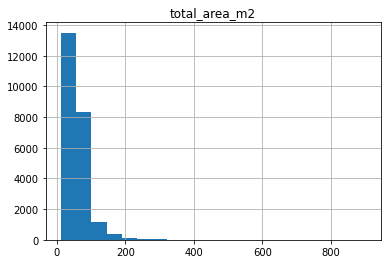

In [56]:
print(df.hist('total_area_m2', bins=20))#гистограмма общей площади

[[<AxesSubplot:title={'center':'rooms'}>]]


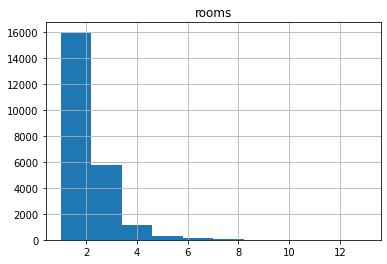

In [57]:
print(df.hist('rooms',range=(1, 13)))#гистограмма для чистла комнат

[[<AxesSubplot:title={'center':'last_price'}>]]


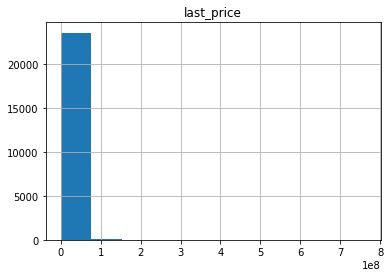

In [58]:
print(df.hist('last_price'))#гистораграмма цены

[[<AxesSubplot:title={'center':'ceiling_height'}>]]


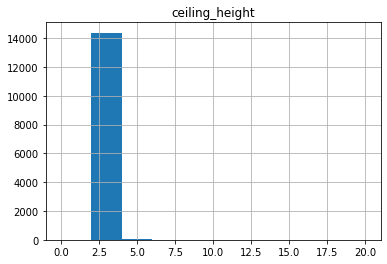

In [59]:
print(df.hist('ceiling_height',range=(0, 20)))

2)Изучим время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

[[<AxesSubplot:title={'center':'days_exposition'}>]]


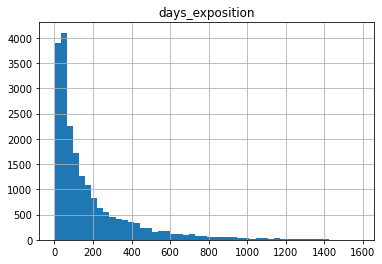

In [60]:
print(df.hist('days_exposition',bins=50))

In [61]:
df['days_exposition'].median()#посчитали медиану

95.0

In [62]:
df['days_exposition'].mean()#посчитали среднее

180.7531998045921

In [63]:
df['days_exposition'].describe()

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

В среднем квартиры подаются 180 дней, все что более 219 дней это слишком долго для продажи, ,быстро квартиры продаются, меньше среднего значения

3)Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

-максимамальная прощадь квартиры 900 м2

-высота потолка 1м и 100м

-19 комнат в квартире

-цена 763 000 000

In [64]:
df[['last_price', 'rooms', 'ceiling_height', 'total_area_m2', 'days_exposition', 'price_m2']].describe()

,last_price,rooms,ceiling_height,total_area_m2,days_exposition,price_m2
count,"23,650.00","23,650.00","14,490.00","23,650.00","20,470.00","21,752.00"
mean,"6,541,126.90",2.07,2.77,60.33,180.75,"187,520.80"
std,"10,896,399.18",1.08,1.26,35.66,219.78,"186,133.96"
min,"12,190.00",0.00,1.00,12.00,1.00,380.94
25%,"3,400,000.00",1.00,2.52,40.00,45.00,"127,329.19"
50%,"4,650,000.00",2.00,2.65,52.00,95.00,"168,421.05"
75%,"6,799,000.00",3.00,2.80,69.70,231.00,"221,446.02"
max,"763,000,000.00",19.00,100.00,900.00,"1,580.00","21,663,333.33"


In [65]:
#напишем функцию по удалению выбросов
def delete_outliers(df, column, grafic=0, x=10,y=10):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filt = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if grafic == 1:
        return df.loc[filt].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filt]

4)Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

(0.0, 150.0)

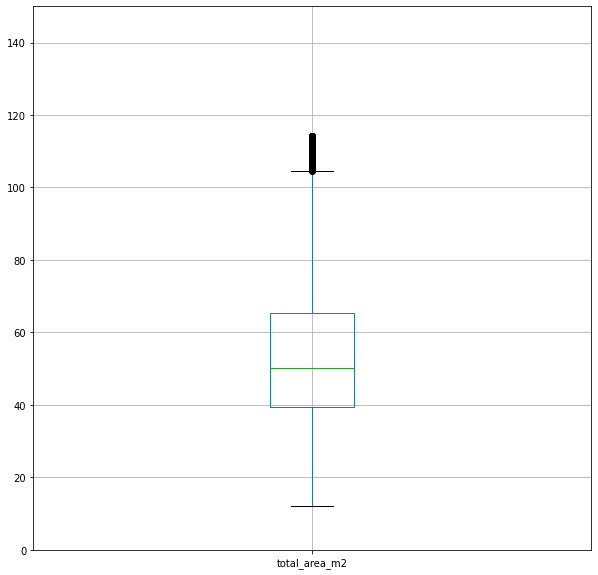

In [66]:
delete_outliers(df, 'total_area_m2',1,10,10).set_ylim(0,150)

In [67]:
delete_outliers(df, 'total_area_m2',0)['total_area_m2'].mean()

54.32568508435241

(0.0, 10000000.0)

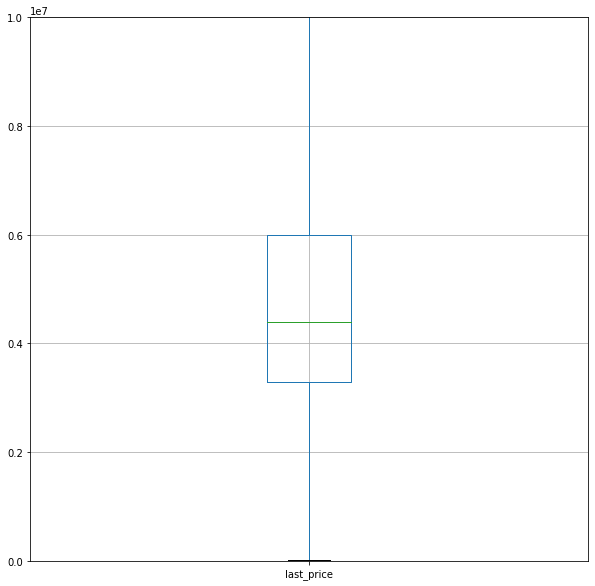

In [68]:
delete_outliers(df, 'last_price',1,10,10).set_ylim(0,10000000)

In [69]:
delete_outliers(df, 'last_price',0)['last_price'].mean()

4838942.090946979

(0.0, 10.0)

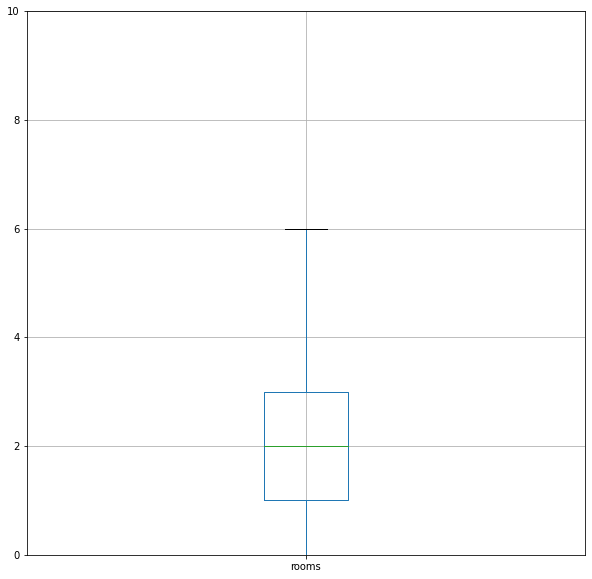

In [70]:
delete_outliers(df, 'rooms',1,10,10).set_ylim(0,10)

In [71]:
delete_outliers(df, 'rooms',0)['rooms'].mean()

2.0473259762309

(0.0, 20.0)

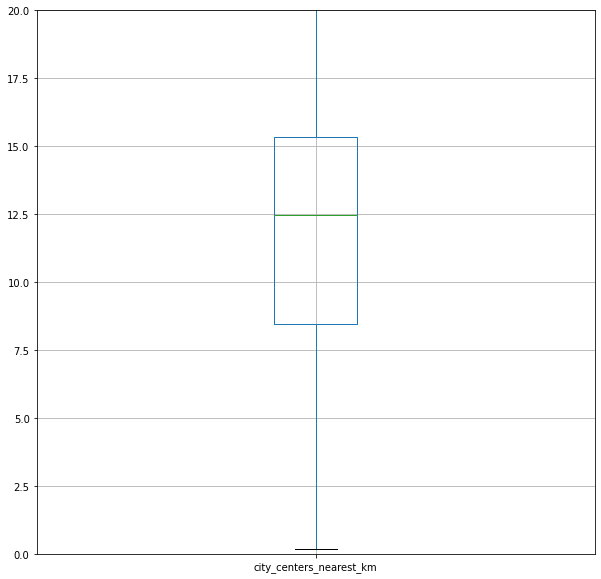

In [72]:
delete_outliers(df, 'city_centers_nearest_km',1,10,10).set_ylim(0,20)

In [73]:
delete_outliers(df, 'city_centers_nearest_km',0)['city_centers_nearest_km'].mean()

12.038010661630315

In [74]:
city_centers_nearest_km_v = df.groupby('city_centers_nearest_km')['last_price'].sum() / \
   df.groupby('city_centers_nearest_km')['last_price'].count() * 100
city_centers_nearest_km_v.sort_values()

city_centers_nearest_km
11.12      119,000,000.00
4.17       168,600,000.00
41.63      180,000,000.00
60.22      180,000,000.00
5.24       180,000,000.00
               ...       
3.79    18,000,000,000.00
6.24    24,500,000,000.00
3.96    27,666,666,666.67
1.07    28,923,840,000.00
1.20    33,000,000,000.00
Name: last_price, Length: 7627, dtype: float64

По показателям отдаленность от центра никак не влияет на стоимость

In [75]:
total_area_v = df.groupby('total_area_m2')['last_price'].sum() / \
   df.groupby('total_area_m2')['last_price'].count()
total_area_v.sort_values()

total_area_m2
28.66        690,000.00
19.50        945,750.00
14.00      1,190,000.00
29.62      1,300,000.00
54.33      1,300,000.00
              ...      
285.70   245,000,000.00
400.00   296,333,333.33
618.00   300,000,000.00
401.00   401,300,000.00
900.00   420,000,000.00
Name: last_price, Length: 2181, dtype: float64

Чем больше квадратура в квартире,тем больше цена

In [76]:
rooms_v = df.groupby('rooms')['last_price'].sum() / \
   df.groupby('rooms')['last_price'].count()
rooms_v

rooms
0      3,337,724.11
1      3,834,079.56
2      5,590,627.54
3      8,181,797.86
4     13,431,852.49
5     23,762,082.09
6     31,709,751.66
7     51,470,069.08
8     50,224,166.67
9     34,152,362.50
10    26,166,666.67
11    25,250,000.00
12   420,000,000.00
14    26,829,500.00
15    65,000,000.00
16    28,500,000.00
19    32,250,000.00
Name: last_price, dtype: float64

до 5 комнат ценв растет вместе с колличеством комнат, далее все хаотично

In [77]:
floor_status_v = df.groupby('floor_status')['last_price'].sum() / \
   df.groupby('floor_status')['last_price'].count()
floor_status_v

floor_status
другой      6,675,825.44
первый      4,800,464.64
последний   7,359,137.80
Name: last_price, dtype: float64

Дешевле всего квартиры, которые находятся на первом этаже, на последнем самые дорогие квартиры

In [78]:
day_of_week_exposition_v = df.groupby('day_of_week_exposition')['last_price'].sum() / \
   df.groupby('day_of_week_exposition')['last_price'].count()
day_of_week_exposition_v

day_of_week_exposition
Friday      6,364,605.38
Monday      6,510,814.86
Saturday    6,982,510.31
Sunday      6,249,359.91
Thursday    6,711,766.63
Tuesday     6,393,782.13
Wednesday   6,626,416.16
Name: last_price, dtype: float64

Дни недели на продажу квартиры никак не влият

In [79]:
month_exposition_v = df.groupby('month_exposition')['last_price'].sum() / \
   df.groupby('month_exposition')['last_price'].count()
month_exposition_v

month_exposition
April       6,742,670.94
August      6,352,839.44
December    7,005,342.66
February    6,464,463.11
January     6,666,974.98
July        6,641,335.94
June        6,311,184.37
March       6,362,919.37
May         6,594,776.78
November    6,461,457.98
October     6,235,165.85
September   6,828,470.77
Name: last_price, dtype: float64

Месяцы тоже никак не влияют, немного дороже квартиры в декабре

In [80]:
year_exposition_v = df.groupby('year_exposition')['last_price'].sum() / \
   df.groupby('year_exposition')['last_price'].count()
year_exposition_v

year_exposition
2014   12,046,600.18
2015    8,592,727.43
2016    6,829,414.85
2017    6,585,821.90
2018    5,952,216.14
2019    6,782,388.39
Name: last_price, dtype: float64

С годами цены не увиличиваются,самые высокие цены были в 2014 году 

In [81]:
df.head()

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_ratio,total_kitchen_ratio
0,20,"13,000,000.00",2019-03-07,3,2.70,16.00,8,0,0,0,NaN,санкт-петербург,NaN,18.86,0.48,0.76,16.03,1.00,2.00,108.00,51.00,25.00,"254,901.96",Thursday,March,2019,другой,0.47,0.23
1,7,"3,350,000.00",2018-12-04,1,NaN,11.00,1,0,0,0,2.00,поселок шушары,81.00,12.82,NaN,NaN,18.60,0.00,0.00,40.40,18.60,11.00,"180,107.53",Tuesday,December,2018,первый,0.46,0.27
2,10,"5,196,000.00",2015-08-20,2,NaN,5.00,4,0,0,0,0.00,санкт-петербург,558.00,21.74,0.09,0.57,13.93,1.00,2.00,56.00,34.30,8.30,"151,486.88",Thursday,August,2015,другой,0.61,0.15
3,0,"64,900,000.00",2015-07-24,3,NaN,14.00,9,0,0,0,0.00,санкт-петербург,424.00,28.10,0.08,0.23,6.80,2.00,3.00,159.00,NaN,NaN,NaN,Friday,July,2015,другой,NaN,NaN
4,2,"10,000,000.00",2018-06-19,2,3.03,14.00,13,0,0,0,NaN,санкт-петербург,121.00,31.86,0.11,0.05,8.10,2.00,1.00,100.00,32.00,41.00,"312,500.00",Tuesday,June,2018,другой,0.32,0.41


In [82]:
corr = df[['last_price',\
           'total_area_m2',\
           'city_centers_nearest_km',\
           'floor_status',\
           'day_of_week_exposition',\
           'month_exposition',\
           'year_exposition']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area_m2,city_centers_nearest_km,year_exposition
last_price,1.000000,0.653743,-0.206887,-0.042927
total_area_m2,0.653743,1.000000,-0.231904,-0.079496
city_centers_nearest_km,-0.206887,-0.231904,1.000000,0.030217
year_exposition,-0.042927,-0.079496,0.030217,1.000000


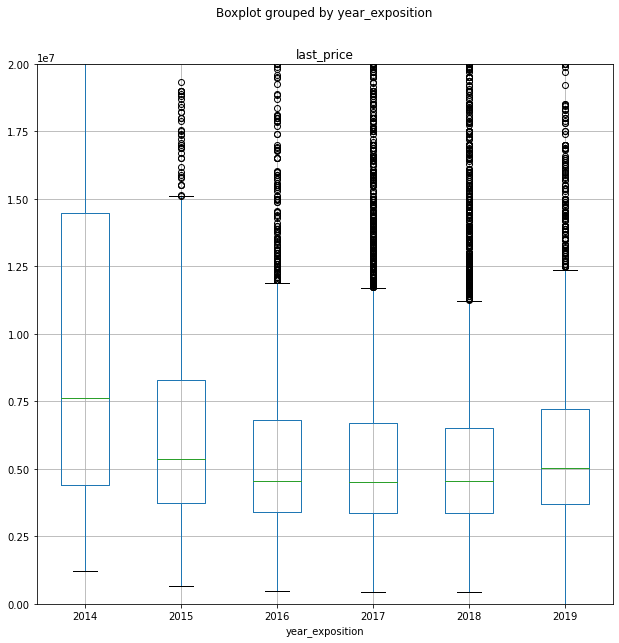

In [83]:
plot = df.boxplot('last_price', by='year_exposition',figsize=(10,10)).set_ylim(0,20000000)

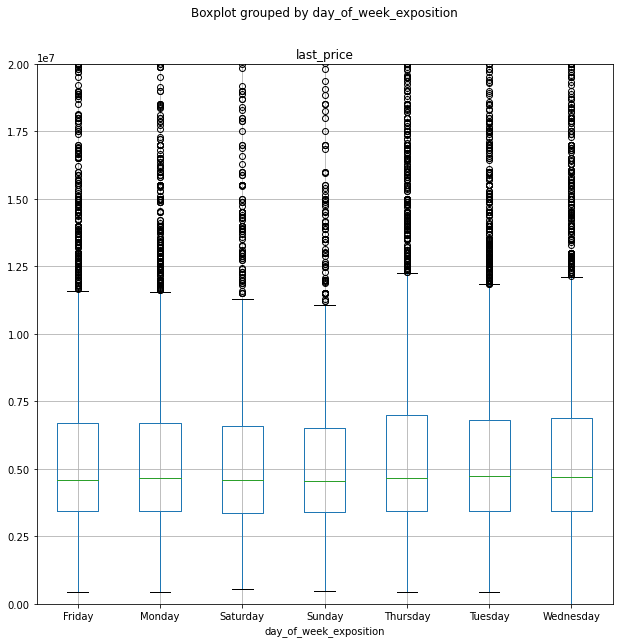

In [84]:
plot = df.boxplot('last_price', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,20000000)

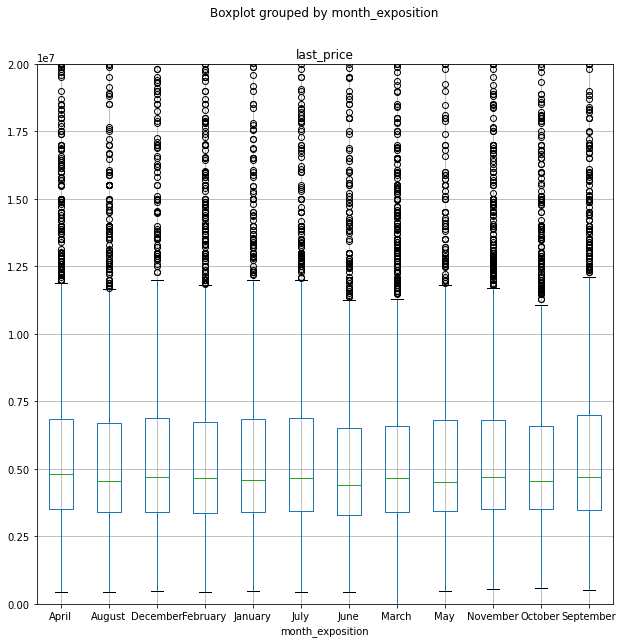

In [85]:
plot = df.boxplot('last_price', by='month_exposition',figsize=(10,10)).set_ylim(0,20000000)

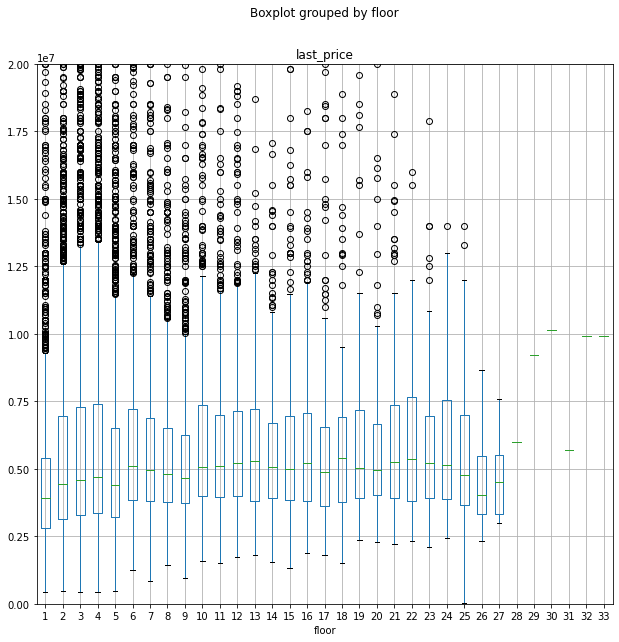

In [86]:
plot = df.boxplot('last_price', by='floor',figsize=(10,10)).set_ylim(0,20000000)

In [87]:
df[['last_price', 'total_area_m2', 'rooms', 'city_centers_nearest_km']].corr()

,last_price,total_area_m2,rooms,city_centers_nearest_km
last_price,1.00,0.65,0.36,-0.21
total_area_m2,0.65,1.00,0.76,-0.23
rooms,0.36,0.76,1.00,-0.18
city_centers_nearest_km,-0.21,-0.23,-0.18,1.00


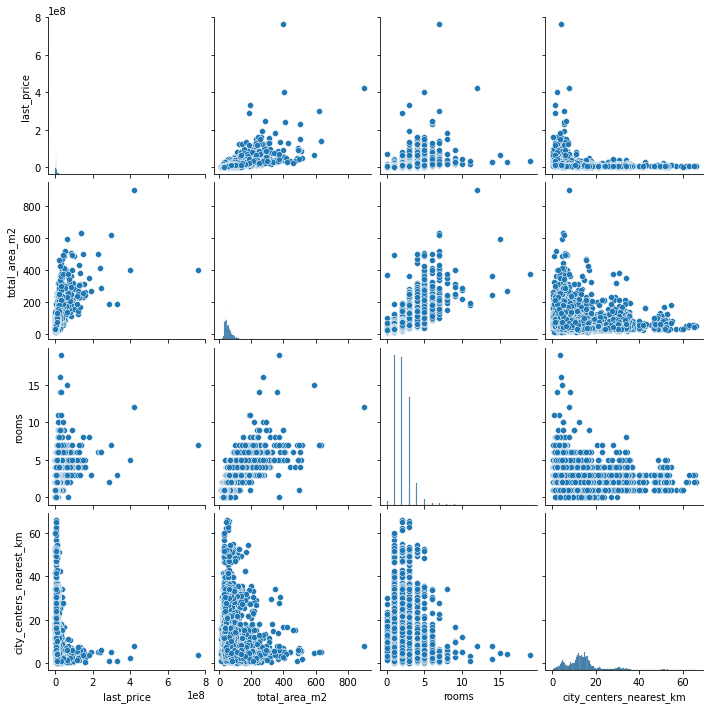

In [88]:
sns.pairplot(df[['last_price', 'total_area_m2', 'rooms', 'city_centers_nearest_km']])

5)Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [89]:
df.groupby('locality_name')['total_area_m2'].count().mean()#нашли среднюю цену за квадратный метр

71.66666666666667

In [90]:
top_advert = df.groupby('locality_name')['total_area_m2'].count().sort_values(ascending=False).head(10)
print(top_advert)

locality_name
санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: total_area_m2, dtype: int64


In [91]:
min_max_prise = df.groupby('locality_name')['last_price'].sum() / \
   df.groupby('locality_name')['last_price'].count()
min_max_prise.sort_values()

locality_name
деревня вахнова кара         450,000.00
деревня старополье           460,000.00
деревня чудской бор          500,000.00
поселок совхозный            517,500.00
поселок станции свирь        575,000.00
                               ...     
санкт-петербург            8,062,507.07
поселок александровская    8,725,000.00
деревня бор               10,397,600.00
деревня хязельки          11,000,000.00
поселок репино            12,166,854.00
Name: last_price, Length: 330, dtype: float64

6)Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [92]:
def city_status(row):
    if row['locality_name'] == 'санкт-петербург':
        return 'Питер'
    else:
        return 'За Питером'

In [93]:
df['city_status'] = df.apply(city_status, axis=1)

In [94]:
df.groupby('city_status').agg({'price_m2': 'mean'}).sort_values(by='price_m2')

,price_m2
city_status,
За Питером,"131,551.97"
Питер,"215,046.52"


In [95]:
df.groupby('city_status').agg({'price_m2': 'median'}).sort_values(by='price_m2')

,price_m2
city_status,
За Питером,"123,456.79"
Питер,"189,054.73"


In [96]:
city_status_centers = df.groupby('city_status')['city_centers_nearest_km'].sum() / \
   df.groupby('city_status')['city_centers_nearest_km'].count()
city_status_centers.sort_values()

city_status
Питер        11.60
За Питером   30.60
Name: city_centers_nearest_km, dtype: float64

In [97]:
city_center = df.dropna(subset=['city_centers_nearest_km'])

In [98]:
city_center['city_centers_nearest_km'].quantile([0.25,0.5,0.75,1])

0.25    9.24
0.50   13.11
0.75   16.29
1.00   65.97
Name: city_centers_nearest_km, dtype: float64

In [99]:
len(city_center.query('city_centers_nearest_km <=8'))#3712 квартиры в пределах 8х км

3712

In [100]:
city_center_d = city_center.query('city_centers_nearest_km <=8')

In [101]:
cor_center = city_center_d.corr()\
    .sort_values('last_price', ascending=False)\
    .filter(items = ['last_price'])\
    .reset_index()
cor_center.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1.000000
1,total_area_m2,0.636407
2,living_area_m2,0.539359
3,kitchen_area_m2,0.508284
4,price_m2,0.358084
5,rooms,0.333342
6,total_images,0.131486
7,floor,0.125747
8,parks_around_3_km,0.108583
9,ponds_around_3_km,0.104545


<AxesSubplot:xlabel='last_price'>

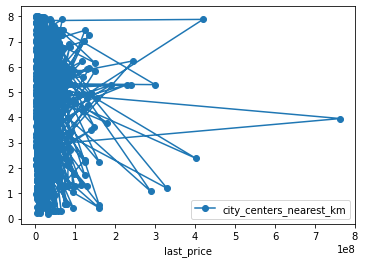

In [115]:
city_center_d.plot(x='last_price', y='city_centers_nearest_km', style='o-')
#в центре самый сильный всплеск цены, график сильно меняется после полутора километра и после 4х километров


7)Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [103]:
city_center_d.sort_values('city_centers_nearest_km', ascending=True).head(20)

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_ratio,total_kitchen_ratio,city_status
13694,2,"31,099,000.00",2018-06-25,5,3.28,5.00,5,0,0,0,NaN,санкт-петербург,NaN,21.63,0.25,0.43,0.18,2.00,3.00,159.00,106.00,15.00,"293,386.79",Monday,June,2018,последний,0.67,0.09,Питер
1182,1,"5,800,000.00",2016-03-10,1,3.70,7.00,4,0,0,0,0.00,санкт-петербург,167.00,21.63,0.30,0.50,0.21,3.00,3.00,33.60,22.80,6.60,"254,385.96",Thursday,March,2016,другой,0.68,0.20,Питер
8614,7,"10,990,000.00",2015-12-16,3,3.90,5.00,3,0,0,0,0.00,санкт-петербург,265.00,21.82,0.23,0.51,0.21,3.00,2.00,100.00,37.80,11.60,"290,740.74",Wednesday,December,2015,другой,0.38,0.12,Питер
1934,18,"9,590,000.00",2017-05-23,2,3.30,5.00,2,0,0,0,0.00,санкт-петербург,69.00,21.91,0.36,0.29,0.29,3.00,3.00,108.00,59.00,11.00,"162,542.37",Tuesday,May,2017,другой,0.55,0.10,Питер
20873,18,"11,500,000.00",2018-09-17,3,4.20,7.00,6,0,0,0,1.00,санкт-петербург,NaN,21.74,0.47,0.09,0.29,2.00,2.00,113.50,44.20,21.70,"260,181.00",Monday,September,2018,другой,0.39,0.19,Питер
10867,1,"56,844,500.00",2015-01-15,3,NaN,6.00,5,1,0,0,NaN,санкт-петербург,NaN,21.86,0.16,0.57,0.32,2.00,3.00,177.90,87.20,87.20,"651,886.47",Thursday,January,2015,другой,0.49,0.49,Питер
11492,1,"46,424,072.00",2014-12-09,2,NaN,6.00,6,1,0,0,1.00,санкт-петербург,"1,030.00",21.86,0.16,0.57,0.32,2.00,3.00,92.40,54.80,20.00,"847,154.60",Tuesday,December,2014,последний,0.59,0.22,Питер
11723,18,"32,500,000.00",2015-01-15,3,3.40,6.00,2,0,0,0,0.00,санкт-петербург,725.00,21.86,0.16,0.57,0.32,2.00,3.00,127.10,56.20,51.80,"578,291.81",Thursday,January,2015,другой,0.44,0.41,Питер
7726,20,"50,000,000.00",2019-04-18,2,NaN,7.00,4,0,0,0,2.00,санкт-петербург,NaN,21.86,0.16,0.57,0.32,2.00,3.00,93.00,40.00,28.00,"1,250,000.00",Thursday,April,2019,другой,0.43,0.30,Питер
5297,19,"45,000,000.00",2018-11-15,2,3.20,6.00,4,1,0,0,1.00,санкт-петербург,NaN,21.86,0.16,0.57,0.32,2.00,3.00,96.00,NaN,45.00,NaN,Thursday,November,2018,другой,NaN,0.47,Питер


In [104]:
city_center_d.sort_values('city_centers_nearest_km', ascending=True).tail(20)

,total_images,last_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,balcony,locality_name,days_exposition,airports_nearest_km,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,parks_around_3_km,ponds_around_3_km,total_area_m2,living_area_m2,kitchen_area_m2,price_m2,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_ratio,total_kitchen_ratio,city_status
20724,4,"20,950,000.00",2016-03-10,4,NaN,10.00,6,0,0,0,0.00,санкт-петербург,197.00,15.90,0.65,NaN,7.95,1.00,0.00,148.00,82.00,19.20,"255,487.80",Thursday,March,2016,другой,0.55,0.13,Питер
734,20,"17,390,000.00",2017-06-06,4,NaN,18.00,10,0,0,0,1.00,санкт-петербург,94.00,17.31,NaN,NaN,7.96,0.00,0.00,113.00,67.00,19.00,"259,552.24",Tuesday,June,2017,другой,0.59,0.17,Питер
5513,5,"9,962,480.00",2015-09-03,3,NaN,14.00,3,0,0,0,0.00,санкт-петербург,659.00,17.31,NaN,NaN,7.96,0.00,0.00,98.50,52.70,19.10,"189,041.37",Thursday,September,2015,другой,0.54,0.19,Питер
21470,20,"15,000,000.00",2017-07-25,2,NaN,12.00,9,0,0,0,0.00,санкт-петербург,15.00,17.31,NaN,NaN,7.96,0.00,0.00,59.00,30.00,13.00,"500,000.00",Tuesday,July,2017,другой,0.51,0.22,Питер
3015,6,"8,484,786.00",2015-12-30,2,2.70,18.00,17,0,0,0,0.00,санкт-петербург,666.00,17.31,NaN,NaN,7.96,0.00,0.00,60.00,NaN,NaN,NaN,Wednesday,December,2015,другой,NaN,NaN,Питер
23627,11,"6,300,000.00",2017-01-27,1,NaN,10.00,4,0,0,0,2.00,санкт-петербург,616.00,17.31,NaN,NaN,7.96,0.00,0.00,42.30,16.30,12.00,"386,503.07",Friday,January,2017,другой,0.39,0.28,Питер
6441,6,"11,675,484.00",2017-06-06,3,2.70,18.00,15,0,0,0,0.00,санкт-петербург,141.00,17.31,NaN,NaN,7.96,0.00,0.00,89.00,NaN,NaN,NaN,Tuesday,June,2017,другой,NaN,NaN,Питер
11089,20,"9,800,000.00",2018-04-11,4,3.00,4.00,1,0,0,0,NaN,санкт-петербург,NaN,38.71,0.62,0.18,7.97,2.00,3.00,105.30,69.00,8.00,"142,028.99",Wednesday,April,2018,первый,0.66,0.08,Питер
7252,16,"4,670,000.00",2017-09-20,1,2.65,12.00,5,0,0,0,NaN,санкт-петербург,216.00,30.60,NaN,0.32,7.98,0.00,2.00,36.00,18.50,8.00,"252,432.43",Wednesday,September,2017,другой,0.51,0.22,Питер
15260,5,"15,500,000.00",2016-06-20,3,2.75,12.00,12,0,0,0,2.00,санкт-петербург,44.00,30.69,NaN,0.40,7.98,0.00,2.00,82.00,60.00,16.00,"258,333.33",Monday,June,2016,последний,0.73,0.20,Питер


In [105]:
rooms_center = city_center_d.groupby('rooms')['last_price'].sum() / \
   city_center_d.groupby('rooms')['last_price'].count()
rooms_center.sort_values()#квартиры до четырех комнат растут плавно в цене, далее же все в хаотичном порядке

rooms
1      6,722,279.45
0      8,710,277.78
2      9,682,139.31
3     14,618,599.93
4     19,575,444.56
11    25,250,000.00
14    26,829,500.00
10    27,750,000.00
16    28,500,000.00
5     28,704,815.42
19    32,250,000.00
6     35,317,453.86
9     44,666,666.67
8     51,435,454.55
7     51,994,259.26
15    65,000,000.00
12   420,000,000.00
Name: last_price, dtype: float64

In [106]:
floor_center = city_center_d.groupby('floor')['last_price'].sum() / \
   city_center_d.groupby('floor')['last_price'].count()
floor_center.sort_values()#самые дешевые квартиры на первом этаже, делее все одиково хаотично

floor
1      9,167,232.76
16    10,067,807.33
14    10,854,097.09
2     12,313,022.64
23    12,995,000.00
3     13,624,943.31
13    14,046,891.00
11    14,958,454.32
4     15,088,639.66
5     15,386,611.96
18    16,147,484.00
21    16,166,666.67
6     17,325,240.49
9     17,554,206.92
12    17,788,450.12
20    18,250,000.00
15    18,535,963.14
8     19,960,600.11
19    21,396,159.33
17    23,571,848.25
7     24,491,818.09
10    25,273,221.26
25   223,850,000.00
Name: last_price, dtype: float64

In [107]:
center_km = city_center_d.groupby('city_centers_nearest_km')['last_price'].sum() / \
   city_center_d.groupby('city_centers_nearest_km')['last_price'].count()
center_km.sort_values()#от отдаленности от цента мало зависит рост цен

city_centers_nearest_km
4.17     1,686,000.00
5.24     1,800,000.00
5.64     1,900,000.00
2.11     2,100,000.00
2.90     2,385,000.00
            ...      
3.79   180,000,000.00
6.24   245,000,000.00
3.96   276,666,666.67
1.07   289,238,400.00
1.20   330,000,000.00
Name: last_price, Length: 1950, dtype: float64

In [108]:
day_exposition = city_center_d.groupby('first_day_exposition')['last_price'].sum() / \
   city_center_d.groupby('first_day_exposition')['last_price'].count()
day_exposition.sort_values()#от даты выставления обьявления цена независит

first_day_exposition
2018-07-29     2,850,000.00
2017-02-06     3,200,000.00
2015-08-04     3,500,000.00
2015-12-09     3,690,000.00
2018-04-12     3,799,000.00
                  ...      
2016-09-23   131,000,000.00
2018-05-22   135,000,000.00
2015-08-27   142,167,000.00
2016-02-20   157,269,966.67
2017-09-30   163,670,000.00
Name: last_price, Length: 1086, dtype: float64

In [109]:
center_area = city_center_d.groupby('total_area_m2')['last_price'].sum() / \
   city_center_d.groupby('total_area_m2')['last_price'].count()
center_area.sort_values()#цена зависит от квадратного метра, чем больше квадратура, тем выше цена

total_area_m2
13.20      1,686,000.00
17.00      1,900,000.00
16.00      2,100,000.00
138.70     2,200,000.00
19.00      2,250,000.00
              ...      
285.70   245,000,000.00
400.00   296,333,333.33
618.00   300,000,000.00
401.00   401,300,000.00
900.00   420,000,000.00
Name: last_price, Length: 1181, dtype: float64

In [110]:
ceiling_h = city_center_d.groupby('ceiling_height')['last_price'].sum() / \
   city_center_d.groupby('ceiling_height')['last_price'].count()
ceiling_h.head(20)

ceiling_height
2.00   12,300,000.00
2.40    8,500,000.00
2.45    6,600,000.00
2.46    7,100,000.00
2.47    7,920,000.00
2.49    6,800,000.00
2.50    7,643,392.00
2.51    6,199,500.00
2.52    5,545,000.00
2.53    6,675,000.00
2.54    4,435,000.00
2.55    5,756,000.00
2.56    6,435,000.00
2.59    4,750,000.00
2.60    7,668,997.50
2.63    6,650,000.00
2.64    8,590,000.00
2.65    6,741,774.19
2.66    6,225,000.00
2.67    9,190,000.00
Name: last_price, dtype: float64

In [111]:
ceiling_h.tail(20)#можно сделать вывод, что высота пололков влияет на цену, у квартир с высокими потолками цена выше

ceiling_height
4.19      4,450,000.00
4.20     24,545,625.00
4.25     11,500,000.00
4.30      9,350,000.00
4.37      8,250,000.00
4.40     35,500,000.00
4.45     63,750,000.00
4.50     24,133,333.33
4.65     91,500,000.00
4.70    120,000,000.00
4.80     14,950,000.00
4.90    115,490,000.00
5.20     66,571,000.00
5.30     79,450,000.00
5.50     38,000,000.00
5.60     59,800,000.00
5.80      8,200,000.00
6.00    119,000,000.00
27.00     8,000,000.00
32.00     9,999,000.00
Name: last_price, dtype: float64


После проведения анализа можно сделать вывод:

-квартиры ближе к центру дороже;

-на первом этаже и в общем анализе и в центральных обьектах квартиры дешевле чем на других этажах;

-у квартир с высокими потолками цена выше;

-чем больше квадратура, тем дороже квартира;

-с 1 до 5ти комнат цена растет и в общем анализе и в ценральном обьекте, далее не зависит от колличества комнат.


## Общий вывод

Мы проанализировали недвижимость Санкт-Петербурга и его область(поселки и деревни). Цены на недвижимость в Петербурге порядком дороже, в его пределах средняя стоимость квадратного метра(215000), а за его пределами(132000), но есть районы где цена выше чем в Санкт-Петербурге(возможно это элитные ЖК или поселки, либо большая квадратура). На первом этаже везде квартиры дешевле, чем выше потолки тем выше цена, но после 4х метров. В деревнях недвижимость самая дешевая. Спрос на недвижимость никак не зависит от дня, месяца и года выставления обьявления, есть небольшой всплеск в декабре. До 5ти комнат в квартире, цена плавно растет. Скорее всего цена зависит от района и ЖК, к какому уровню он относится.